In [2]:
import Pkg; 

if split(pwd(),"/")[end] == "_paper_2"
    cd(joinpath(@__DIR__, "../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol
using CairoMakie
using JLD2
using StaticArrays
cd(joinpath(@__DIR__, "../SolSim.jl_Notebooks"))
Pkg.activate("Project.toml")

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`


LoadError: IOError: cd("/Users/ivanspirandelli/Doktor/Code/MorphoMol/MorphoMolNotebooks/../SolSim.jl_Notebooks"): no such file or directory (ENOENT)

In [2]:
ca_file = "../SolSim.jl_dev/assets/data_vault/three_protein_sub_units/protor_oj_0_0_os_0_85/6r7m/5/75_6r7m_protor_oj_0_0_os_0_85.jld2"
st_file = "../SolSim.jl_dev/assets/data_vault/three_protein_sub_units/protor_oj_0_0_os_0_85/6r7m/3/24_6r7m_protor_oj_0_0_os_0_85.jld2"

"../SolSim.jl_dev/assets/data_vault/three_protein_sub_units/protor_oj_0_0_os_0_85/6r7m/3/24_6r7m_protor_oj_0_0_os_0_85.jld2"

In [3]:
@load ca_file output_container
n = length(output_container.initial_state.radii)
new_color_1 = @SVector[0.32, 0.06, 0.25]
new_color_2 = @SVector[0.98, 0.54, 0.14]
new_color_3 = @SVector[0.06, 0.3, 0.36]
colors = [[new_color_1 for i in 1:n]; [new_color_2 for i in 1:n]; [new_color_3 for i in 1:n]];

Es = output_container.Es
last_disp_id = findall(x->isapprox(x,Es[1]), Es)[end]
rn = last_disp_id:argmin(Es)
SolSim.Utilities.generate_polys_and_energy_plot_for_range(ca_file, "Plots/three_sub_units/ca/", rn, colors)


@load st_file output_container
n = length(output_container.initial_state.radii)
new_color_1 = @SVector[0.32, 0.06, 0.25]
new_color_2 = @SVector[0.98, 0.54, 0.14]
new_color_3 = @SVector[0.06, 0.3, 0.36]
colors = [[new_color_1 for i in 1:n]; [new_color_2 for i in 1:n]; [new_color_3 for i in 1:n]];
Es = output_container.Es
min_id = argmin(Es)
last_disp_id = findall(x->isapprox(x,Es[1]), Es)[end]
rn = last_disp_id:argmin(Es)
SolSim.Utilities.generate_polys_and_energy_plot_for_range(st_file, "Plots/three_sub_units/st/", rn, colors)

CairoMakie.Screen{IMAGE}


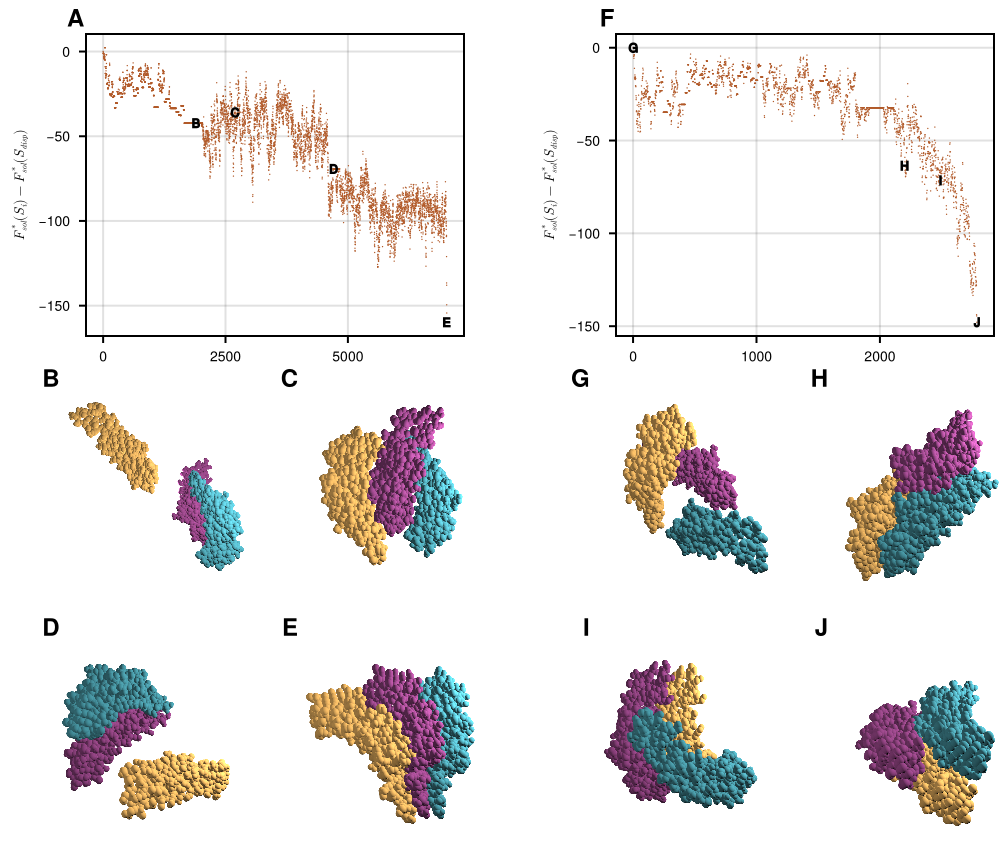

In [9]:
paired_colors = cgrad(:Paired_12, 12, categorical = true)
pf = SolSim.SolvationFreeEnergy.get_prefactors_from_white_bear(1.4, 0.3665)

pt_per_in = 72
width =  7
height = 6.0
f_size = (pt_per_in * width, pt_per_in * height)
fs = 7
border_width = 0.5
fig = Figure(size = f_size, fontsize = fs)

colsize = f_size[1] * 0.6
png_dimension = colsize / 3.2
plot_width = colsize / 1.6
plot_height = colsize / 2.0
pad = 1
ms = 1

@load ca_file output_container
Es = output_container.Es
min_id = argmin(Es)
last_disp_id = findall(x->isapprox(x,Es[1]), Es)[end]
Es = output_container.Es[last_disp_id:min_id]
xs = 1:length(Es)

ga = fig[1:2, 1:2] = GridLayout()
ax, _ = scatter(ga[1, 1], [i for i in 1:length(Es)], Es .- Es[1] , markersize = ms, color = paired_colors[12], 
axis = (ylabel = L"F^*_{sol}(S_i) - F^*_{sol}(S_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height, xticksize = 3.0, yticksize = 3.0,)
)

i1 = 1900
i2 = 2696
i3 = 4713
i4 = 7021
sw = 0.7
scatter!(ax, [i1], [Es[i1] - Es[1]], markersize = 6, marker = 'B', color = :black, strokewidth = sw)
scatter!(ax, [i2], [Es[i2] - Es[1]], markersize = 6, marker = 'C', color = :black, strokewidth = sw)
scatter!(ax, [i3], [Es[i3] - Es[1]], markersize = 6, marker = 'D', color = :black, strokewidth = sw)
scatter!(ax, [i4], [Es[i4] - Es[1]], markersize = 6, marker = 'E', color = :black, strokewidth = sw)

# spacing_color = :transparent
# g_box = fig[2, 1:6] = GridLayout()
# Box(g_box[1, 1], width = 50, height = plot_height * 1.2,  color = spacing_color, strokewidth = 0)

gb = fig[3, 1] = GridLayout()
img = load("Plots/pngs/3/ca/1.png")
ax, _ = image(gb[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gc = fig[3, 2] = GridLayout()
img = load("Plots/pngs/3/ca/2.png")
ax, _ = image(gc[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gd = fig[4, 1] = GridLayout()
img = load("Plots/pngs/3/ca/3.png")
ax, _ = image(gd[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

ge = fig[4, 2] = GridLayout()
img = load("Plots/pngs/3/ca/4.png")
ax, _ = image(ge[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

@load st_file output_container
Es = output_container.Es
min_id = argmin(Es)
last_disp_id = findall(x->isapprox(x,Es[1]), Es)[end]
Es = output_container.Es[last_disp_id:min_id]
xs = 1:length(Es)-1

gf = fig[1:2, 3:4] = GridLayout()
ax,_ = scatter(gf[1, 1], [i for i in 1:length(Es)], Es .- Es[1] , markersize = ms, color = paired_colors[12], 
axis = (ylabel = L"F^*_{sol}(S_i) - F^*_{sol}(S_{disp})", ylabelrotation = pi/2, width = plot_width, height = plot_height, xticksize = 3.0, yticksize = 3.0,)
)

i1 = 1
i2 = 2200
i3 = 2491
i4 = 2785
sw = 0.7
scatter!(ax, [i1], [Es[i1] - Es[1]], markersize = 6, marker = 'G', color = :black, strokewidth = sw)
scatter!(ax, [i2], [Es[i2] - Es[1]], markersize = 6, marker = 'H', color = :black, strokewidth = sw)
scatter!(ax, [i3], [Es[i3] - Es[1]], markersize = 6, marker = 'I', color = :black, strokewidth = sw)
scatter!(ax, [i4], [Es[i4] - Es[1]], markersize = 6, marker = 'J', color = :black, strokewidth = sw)

gg = fig[3, 3] = GridLayout()
img = load("Plots/pngs/3/st/1.png")
ax, _ = image(gg[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gh = fig[3, 4] = GridLayout()
img = load("Plots/pngs/3/st/2.png")
ax, _ = image(gh[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gi = fig[4, 3] = GridLayout()
img = load("Plots/pngs/3/st/3.png")
ax, _ = image(gi[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)

gj = fig[4, 4] = GridLayout()
img = load("Plots/pngs/3/st/4.png")
ax, _ = image(gj[1, 1], rotr90(img),
    axis = (
        width = png_dimension, 
        height = png_dimension, 
        title = "",
        spinewidth=border_width
        )
    )
hidespines!(ax)
hidedecorations!(ax)
# spacing_color = :transparent
# g_box = fig[3, 1:6] = GridLayout()
# Box(g_box[1, 1], width = 50,  color = spacing_color, strokewidth = 0)

for (label, layout) in zip(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"], [ga, gb, gc, gd, ge, gf, gg, gh, gi, gj])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 12,
        font = :bold,
        padding = (0, pad, pad, 0),
        halign = :right)
end

rowsize!(fig.layout, 1, Relative(0.1))
rowgap!(fig.layout, 0)

rowgap!(fig.layout, 15)
colgap!(fig.layout, 15)
save("Plots/output/3su_low_energy_states.pdf", fig, pt_per_unit = 1)
fig